# CNN Hyperparameters
In this notebook, you will observe the effect of various hyperparameters on the training of a deep convolutional neural network.

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

data_root = "/home/space/datasets"

# Define network architecture

Implement the `__init__` and `forward` methods of the class `Net` with the same architecture as in *cnn_example.ipynb*. Add a dropout layer to the model after the second ConvLayer using **`nn.Dropout2d`** . The dropout ratio can be specified when creating the network and it should be a member variable of the class `Net`, i.e. it can be accessed by `self.dropout_ratio` inside the class. *See cnn_example.ipynb as a reference*.

In [2]:
nn.Dropout2d?

In [3]:
class Net(nn.Module):
    def __init__(self, dropout_ratio=0.1):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.dropout_ratio = dropout_ratio
        self.conv2drop = nn.Dropout2d(p=self.dropout_ratio, inplace=False)
        
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        
        x = F.dropout(x)
        x = x.view(-1, 20 * 4 * 4)  # Reshape to vector
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Data loading and model setup
Implement a function `setup` that builds the data loader as well as the model and optimizer. All relevant hyperparameters parameters are parsed as optional arguments to the function. *See cnn_example.ipynb as a reference*.

In [4]:
def setup(dropout_ratio=0.5, lr=1e-2, momentum=0.5, batch_size=128, mean=0.1307, std=0.3081):
    transformation = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))  # Standardization - grayscale img so 1 channel
                       ])

    # Setup data loader
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST(data_root, train=True, transform=transformation),
        batch_size=batch_size
    )
    device = torch.cuda.current_device()
    print(f"Using GPU {device}.")
    model = Net(dropout_ratio).to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    return train_loader, device, model, optimizer

## Training
Below you are given a function that performs the training for a single epoch.

In [5]:
def train_epoch(model, device, train_loader, optimizer):
    model.train()
    
    losses = list()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    return losses

Setup the data loader, model and optimizer, run the training (e.g. for 3 epochs) and plot the evolution of the training loss.

Using GPU 0.


 20%|██        | 1/5 [00:09<00:36,  9.12s/it]

Average loss in epoch 0: 0.96333


 40%|████      | 2/5 [00:18<00:27,  9.15s/it]

Average loss in epoch 1: 0.28927


 60%|██████    | 3/5 [00:27<00:18,  9.26s/it]

Average loss in epoch 2: 0.21287


 80%|████████  | 4/5 [00:37<00:09,  9.46s/it]

Average loss in epoch 3: 0.17522


100%|██████████| 5/5 [00:47<00:00,  9.53s/it]

Average loss in epoch 4: 0.15116


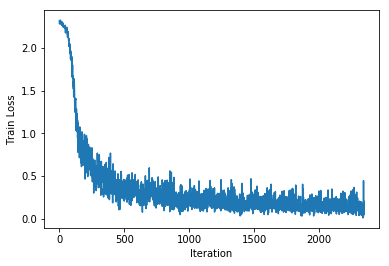

In [6]:
plt.figure()
train_loader, device, model, optimizer = setup()
losses = list()
for epoch in tqdm(range(5)):
    epoch_losses = train_epoch(model, device, train_loader, optimizer)
    print(f"Average loss in epoch {epoch}: {np.mean(epoch_losses):.5f}")
    losses.extend(epoch_losses)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.show()

## Hyperparameter Tuning
Try out several values (given below) of the following hyperparameters:
* Learning rate
* Momentum
* Batch size

Visualize the learning curves in one plot for comparison.

*Optional*: Investigate the result if you assume that the data are already normalized (change the mean and standard deviation accordingly).

In [7]:
lrs = [1e0, 1e-2, 1e-4]
momenta = [0.0, 0.5, 0.9]
batch_sizes = [32, 128, 1024]  # CAVE: compare epochs, not iterations
dropout_ratios = [0.0, 0.5, 0.7]

### Learning rate

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:09<00:36,  9.18s/it]

Average loss in epoch 0: 2.31040


 40%|████      | 2/5 [00:18<00:27,  9.23s/it]

Average loss in epoch 1: 2.30488


 60%|██████    | 3/5 [00:27<00:18,  9.29s/it]

Average loss in epoch 2: 2.30379


 80%|████████  | 4/5 [00:37<00:09,  9.31s/it]

Average loss in epoch 3: 2.30379


100%|██████████| 5/5 [00:47<00:00,  9.54s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 2.30379


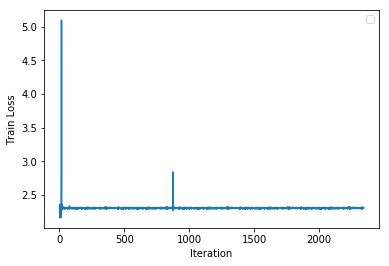

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:10<00:40, 10.22s/it]

Average loss in epoch 0: 0.85456


 40%|████      | 2/5 [00:19<00:30, 10.07s/it]

Average loss in epoch 1: 0.26246


 60%|██████    | 3/5 [00:29<00:19,  9.81s/it]

Average loss in epoch 2: 0.19736


 80%|████████  | 4/5 [00:38<00:09,  9.71s/it]

Average loss in epoch 3: 0.16538


100%|██████████| 5/5 [00:48<00:00,  9.83s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.14864


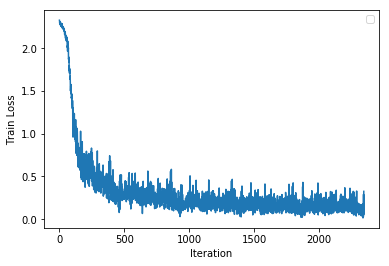

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:09<00:39,  9.78s/it]

Average loss in epoch 0: 2.30141


 40%|████      | 2/5 [00:19<00:29,  9.70s/it]

Average loss in epoch 1: 2.29459


 60%|██████    | 3/5 [00:28<00:19,  9.69s/it]

Average loss in epoch 2: 2.28629


 80%|████████  | 4/5 [00:38<00:09,  9.67s/it]

Average loss in epoch 3: 2.27823


100%|██████████| 5/5 [00:48<00:00,  9.63s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 2.27011


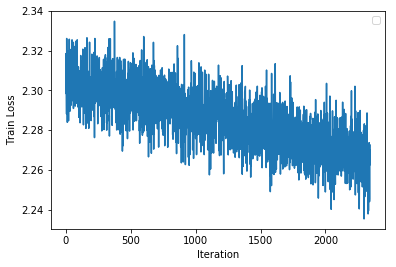

In [8]:
plt.figure()
for lr in lrs:
    losses = []
    train_loader, device, model, optimizer = setup(lr = lr)
    for epoch in tqdm(range(5)):
        epoch_losses = train_epoch(model, device, train_loader, optimizer)
        print(f"Average loss in epoch {epoch}: {np.mean(epoch_losses):.5f}")
        losses.extend(epoch_losses)
    plt.plot(losses)

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Train Loss")
    plt.show()

### Momentum

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:09<00:38,  9.53s/it]

Average loss in epoch 0: 1.28437


 40%|████      | 2/5 [00:19<00:28,  9.55s/it]

Average loss in epoch 1: 0.41035


 60%|██████    | 3/5 [00:28<00:18,  9.47s/it]

Average loss in epoch 2: 0.29480


 80%|████████  | 4/5 [00:37<00:09,  9.35s/it]

Average loss in epoch 3: 0.24448


100%|██████████| 5/5 [00:46<00:00,  9.26s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.21227


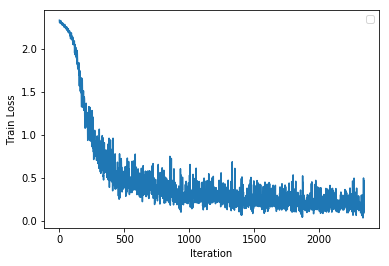

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:09<00:36,  9.20s/it]

Average loss in epoch 0: 0.91297


 40%|████      | 2/5 [00:18<00:27,  9.17s/it]

Average loss in epoch 1: 0.26260


 60%|██████    | 3/5 [00:27<00:18,  9.17s/it]

Average loss in epoch 2: 0.19552


 80%|████████  | 4/5 [00:36<00:09,  9.16s/it]

Average loss in epoch 3: 0.16619


100%|██████████| 5/5 [00:45<00:00,  9.15s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.14590


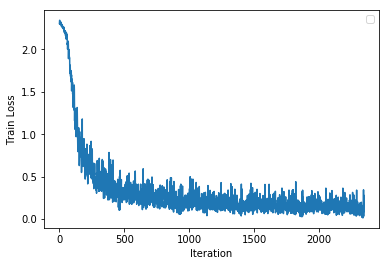

Using GPU 0.


 20%|██        | 1/5 [00:09<00:37,  9.46s/it]

Average loss in epoch 0: 0.46260


 40%|████      | 2/5 [00:18<00:28,  9.44s/it]

Average loss in epoch 1: 0.14794


 60%|██████    | 3/5 [00:28<00:18,  9.45s/it]

Average loss in epoch 2: 0.11335


 80%|████████  | 4/5 [00:37<00:09,  9.43s/it]

Average loss in epoch 3: 0.09720


100%|██████████| 5/5 [00:47<00:00,  9.39s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.08934


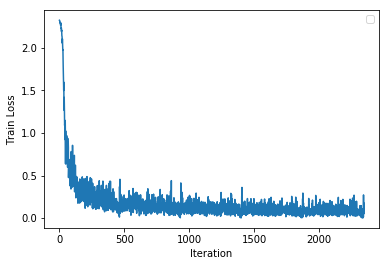

In [9]:
plt.figure()
for momentum in momenta:
    losses = []
    train_loader, device, model, optimizer = setup(momentum = momentum)
    for epoch in tqdm(range(5)):
        epoch_losses = train_epoch(model, device, train_loader, optimizer)
        print(f"Average loss in epoch {epoch}: {np.mean(epoch_losses):.5f}")
        losses.extend(epoch_losses)
    plt.plot(losses)

    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Train Loss")
    plt.show()

### Batch size

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:13<00:54, 13.62s/it]

Average loss in epoch 0: 0.42983


 40%|████      | 2/5 [00:27<00:41, 13.79s/it]

Average loss in epoch 1: 0.16032


 60%|██████    | 3/5 [00:43<00:28, 14.25s/it]

Average loss in epoch 2: 0.12781


 80%|████████  | 4/5 [00:57<00:14, 14.21s/it]

Average loss in epoch 3: 0.10673


100%|██████████| 5/5 [01:11<00:00, 14.23s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.09593


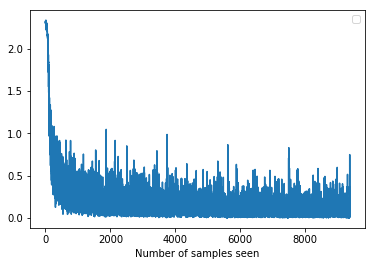

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:10<00:41, 10.36s/it]

Average loss in epoch 0: 0.91888


 40%|████      | 2/5 [00:20<00:31, 10.36s/it]

Average loss in epoch 1: 0.26756


 60%|██████    | 3/5 [00:31<00:20, 10.44s/it]

Average loss in epoch 2: 0.19684


 80%|████████  | 4/5 [00:41<00:10, 10.31s/it]

Average loss in epoch 3: 0.16729


100%|██████████| 5/5 [00:51<00:00, 10.30s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.14919


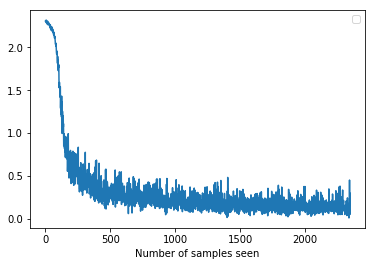

  0%|          | 0/5 [00:00<?, ?it/s]

Using GPU 0.


 20%|██        | 1/5 [00:08<00:33,  8.32s/it]

Average loss in epoch 0: 2.26446


 40%|████      | 2/5 [00:16<00:24,  8.32s/it]

Average loss in epoch 1: 1.88267


 60%|██████    | 3/5 [00:25<00:16,  8.34s/it]

Average loss in epoch 2: 0.96842


 80%|████████  | 4/5 [00:34<00:08,  8.58s/it]

Average loss in epoch 3: 0.61900


100%|██████████| 5/5 [00:43<00:00,  8.69s/it]
No handles with labels found to put in legend.


Average loss in epoch 4: 0.48483


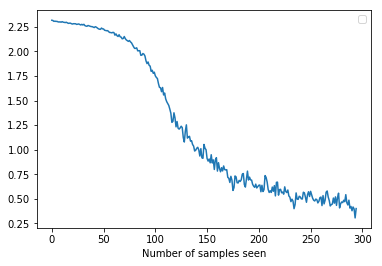

In [10]:
# Make sure you compare the losses for the same number of samples seen (not the number of iterations of gradient descent).

plt.figure()
for batch_size in batch_sizes:
    losses = []
    train_loader, device, model, optimizer = setup(batch_size = batch_size)
    for epoch in tqdm(range(5)):
        epoch_losses = train_epoch(model, device, train_loader, optimizer)
        print(f"Average loss in epoch {epoch}: {np.mean(epoch_losses):.5f}")
        losses.extend(epoch_losses)
    plt.plot(losses)

    plt.legend()
    plt.xlabel("Number of samples seen")
    plt.show()

## Generalization error
Even though the training loss can give valuable hints on the hyperparameters, it is typically not what we are interested in. Much more important is the performance of the model on unseen data, the so called validation/test data. Implement a data loader `test_loader` for the test data (similar to the training data loader but set the `train` parameter of `datasets.MNIST` to `False`).

In [31]:
transformation = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))  # Standardization - grayscale img so 1 channel
                   ])

test_loader = torch.utils.data.DataLoader(
        datasets.MNIST(data_root, train=False,transform=transformation),
        batch_size=128
    )
print(f"Evaluating on {len(test_loader.dataset)} samples.")

Evaluating on 10000 samples.


Implement an evaluation function that runs and evaluates the model. Compute the loss **and** the accuracy on the evaluation data.

In [32]:
def evaluate(model, device, data_loader):
    model.eval()
    losses = list()
    correct = 0
    num_samples = 0
    
    with torch.no_grad():  # Tell the model that we do not need gradient computation for evaluation
        for data, target in data_loader:
            # Compute output of network
            data, target = data.to(device), target.to(device)
        
            output = model(data)
            
            # Compute loss and store in list
            loss = F.nll_loss(output, target)
            losses.append(loss.item())
            
            prediction = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += prediction.eq(target.view_as(prediction)).sum().item()
            
            num_samples += len(data)

    # Compute average loss and accuracy
    accuracy = correct/num_samples
    avg_loss = sum(losses) / len(losses) 
    
    return avg_loss, accuracy

### Performance at chance level
Verify your evaluation function by running it on an untrained model on both the training and the test set. You can use the `setup` function from above to get a randomly initialized network or by calling the constructor of the `Net` class.

Which values do you expect for the test loss and accuracy?

In [33]:
losses = []
train_loader, device, model, _ = setup()
avg_train_loss, train_accuracy = evaluate(model, device, train_loader)
avg_test_loss, test_accuracy = evaluate(model, device, test_loader)

print(f"Training set: \n \t Average loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.0f}%")
print(f"Test set: \n \t Average loss: {avg_test_loss:.4f}, Accuracy: {test_accuracy:.0f}%")

Using GPU 0.
5851
60000
965
10000
Training set: 
 	 Average loss: 2.3139, Accuracy: 0%
Test set: 
 	 Average loss: 2.3160, Accuracy: 0%


### Performance on trained model
Evaluate a trained model (training procedure is provided below) on both the training and validation data.

In [34]:
train_loader, device, model, optimizer = setup()

losses = list()
for epoch in tqdm(range(10)):
    epoch_losses = train_epoch(model, device, train_loader, optimizer)
    losses.extend(epoch_losses)

  0%|          | 0/10 [00:00<?, ?it/s]

Using GPU 0.


100%|██████████| 10/10 [01:33<00:00,  9.51s/it]


In [35]:
avg_train_loss, train_accuracy = evaluate(model, device, train_loader)
avg_test_loss, test_accuracy = evaluate(model, device, test_loader)

print(f"Training set: \n \t Average loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.0f}%")
print(f"Test set: \n \t Average loss: {avg_test_loss:.4f}, Accuracy: {test_accuracy:.0f}%")

58191
60000
9704
10000
Training set: 
 	 Average loss: 0.0984, Accuracy: 1%
Test set: 
 	 Average loss: 0.0937, Accuracy: 1%


### Evolution of test performance over training
Below you are given code to track and plot the test accuracy for different epochs during training.

In [36]:
train_loader, device, model, optimizer = setup(momentum=0.9)

train_losses = list()
test_losses = list()
train_accuracies = list()
test_accuracies = list()
val_epochs = list()
for epoch in tqdm(range(8)):
    # Training
    epoch_losses = train_epoch(model, device, train_loader, optimizer)
    train_losses.append(np.mean(epoch_losses))
    
    # Evaluation (only every other epoch)
    if epoch % 2 == 0:
        avg_test_losses, test_accuracy = evaluate(model, device, test_loader)
    
        test_losses.append(avg_test_losses)
        test_accuracies.append(test_accuracy) 
        val_epochs.append(epoch)

  0%|          | 0/8 [00:00<?, ?it/s]

Using GPU 0.


 12%|█▎        | 1/8 [00:11<01:18, 11.20s/it]

9419
10000


 38%|███▊      | 3/8 [00:30<00:52, 10.48s/it]

9655
10000


 62%|██████▎   | 5/8 [00:49<00:30, 10.12s/it]

9762
10000


 88%|████████▊ | 7/8 [01:09<00:09,  9.96s/it]

9795
10000


100%|██████████| 8/8 [01:18<00:00,  9.67s/it]


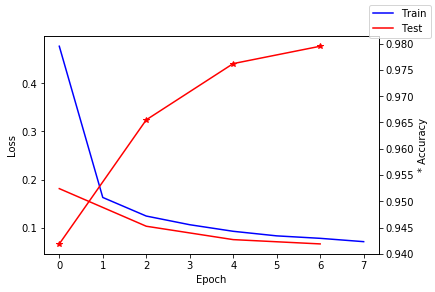

In [37]:
# Plot
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.plot(train_losses, color="b", label="Train")
ax1.plot(val_epochs, test_losses, color="r", label="Test")
ax2 = ax1.twinx()
ax2.set_ylabel('* Accuracy')
ax2.plot(val_epochs, test_accuracies, color="r", marker="*")
fig.legend()
plt.show()